# Generating demographic summary statistics

In [27]:
from video_analytics import *
from pymongo import MongoClient
from collections import defaultdict
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
mc = MongoClient()
if 'store_name' in mc.database_names():
    mc.drop_database('store_name')
store_db = mc['store_name']
store_collections = store_db['storefront']

In [21]:
# Each result has a timestamp in it, the timestamps are not unique, repeat for people
results = get_results()
for result in results:
    store_collections.insert_one(result)

Start Job Id: 1544d7c9417f21925f51f27324c04b0c563167ab7a8476ad404a33c316405c07
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
....................
..................

In [32]:
store_collections.find_one()

{'_id': ObjectId('5c0359bca73b06763844fe53'),
 'Timestamp': 3399,
 'Person': {'Index': 0,
  'Face': {'BoundingBox': {'Width': 0.04350563883781433,
    'Height': 0.10501418262720108,
    'Left': 0.07540211826562881,
    'Top': 0.25185006856918335},
   'AgeRange': {'Low': 48, 'High': 68},
   'Smile': {'Value': True, 'Confidence': 97.1988754272461},
   'Eyeglasses': {'Value': False, 'Confidence': 100.0},
   'Sunglasses': {'Value': False, 'Confidence': 100.0},
   'Gender': {'Value': 'Male', 'Confidence': 93.65911865234375},
   'Beard': {'Value': False, 'Confidence': 91.30879974365234},
   'Mustache': {'Value': False, 'Confidence': 99.90252685546875},
   'EyesOpen': {'Value': False, 'Confidence': 95.94684600830078},
   'MouthOpen': {'Value': False, 'Confidence': 57.76811981201172},
   'Emotions': [{'Type': 'HAPPY', 'Confidence': 46.93202209472656},
    {'Type': 'CALM', 'Confidence': 7.430604934692383},
    {'Type': 'DISGUSTED', 'Confidence': 16.845468521118164},
    {'Type': 'CONFUSED', 'Co

# Person and face traffic v/s timestamp

In [55]:
timestamp_face_count_dict = defaultdict(int)
timestamp_person_count_dict = defaultdict(int)
timestamp_male_count_dict = defaultdict(int)
timestamp_female_count_dict = defaultdict(int)
timestamp_youth_count_dict = defaultdict(int) # [0 - 18) years
timestamp_adult_count_dict = defaultdict(int) # [18 - 60) years
timestamp_seniors_count_dict = defaultdict(int) # [>60] years

for result in results:
    timestamp = result['Timestamp']
    
    timestamp_person_count_dict[timestamp] += 1
    
    if 'Face' in result['Person']:
        timestamp_face_count_dict[timestamp] += 1
        
        # Male count
        if result['Person']['Face']['Gender']['Value'] == 'Male' and result['Person']['Face']['Gender']['Confidence'] >= 75:
            timestamp_male_count_dict[timestamp] += 1
        
        # Female count
        if result['Person']['Face']['Gender']['Value'] == 'Female' and result['Person']['Face']['Gender']['Confidence'] >= 75:
            timestamp_female_count_dict[timestamp] += 1 
            
        
        avg_age = (result['Person']['Face']['AgeRange']['Low'] + result['Person']['Face']['AgeRange']['High']) / 2
        
        # Youth count
        if avg_age >= 0 and avg_age < 18:
            timestamp_youth_count_dict[timestamp] += 1 
        # Adult count
        elif avg_age >= 18 and avg_age < 60:
            timestamp_adult_count_dict[timestamp] += 1
        # Seniors count
        else:
            timestamp_seniors_count_dict[timestamp] += 1 
            
    else:
        timestamp_male_count_dict[timestamp],timestamp_female_count_dict[timestamp], timestamp_youth_count_dict[timestamp], timestamp_adult_count_dict[timestamp], timestamp_seniors_count_dict[timestamp] = 0, 0, 0, 0, 0
         

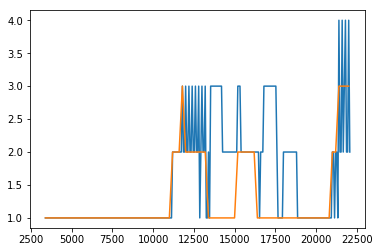

In [36]:
# Person and face traffic
plt.plot(list(map(int, timestamp_person_count_dict.keys())), timestamp_person_count_dict.values(),list(map(int, timestamp_face_count_dict.keys())), timestamp_face_count_dict.values())

# Gender Composition

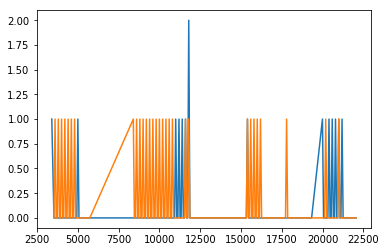

In [42]:
plt.plot(list(map(int, timestamp_male_count_dict.keys())), timestamp_male_count_dict.values(),
         list(map(int, timestamp_female_count_dict.keys())), timestamp_female_count_dict.values())

# Age Composition

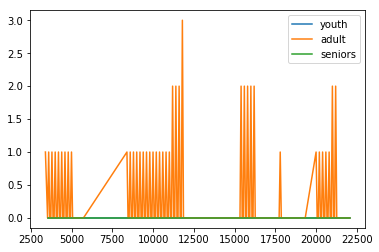

In [54]:
plt.plot(list(map(int, timestamp_youth_count_dict.keys())), timestamp_youth_count_dict.values(),
         list(map(int, timestamp_adult_count_dict.keys())), timestamp_adult_count_dict.values(),
        list(map(int, timestamp_seniors_count_dict.keys())), timestamp_seniors_count_dict.values())
plt.legend(['youth', 'adult', 'seniors'])

# Mood Composition

In [45]:
timestamp_male_count_dict

defaultdict(int,
            {3399: 1,
             3532: 0,
             3665: 0,
             3732: 0,
             3865: 0,
             3932: 0,
             4065: 0,
             4132: 0,
             4265: 0,
             4332: 0,
             4465: 0,
             4532: 0,
             4665: 0,
             4732: 0,
             4865: 0,
             4932: 0,
             4998: 1,
             5065: 0,
             5132: 0,
             5198: 0,
             5265: 0,
             5332: 0,
             5398: 0,
             5465: 0,
             5532: 0,
             5598: 0,
             5665: 0,
             5732: 0,
             8464: 0,
             8531: 0,
             8664: 0,
             8731: 0,
             8864: 0,
             8931: 0,
             9064: 0,
             9131: 0,
             9264: 0,
             9331: 0,
             9464: 0,
             9531: 0,
             9664: 0,
             9731: 0,
             9864: 0,
             9931: 0,
             10